In [1]:
interionic_spacing = .1
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = .5
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end
using Plots
gr() # We will continue onward using the GR backend
plot(x, y, seriestype = :scatter, title = "Top View of Penning Trap")
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)
num_points = 500
rs = LinRange(0, 1, num_points)
θs = LinRange(0, 2π, num_points)
pairs = [(r, θ) for r in rs for θ in θs]
xs = [pair[1] * cos(pair[2]) for pair in pairs]
ys = [pair[1] * sin(pair[2]) for pair in pairs]
xs = LinRange(-1, 1, num_points)
ys = LinRange(-1, 1, num_points)

500-element LinRange{Float64}:
 -1.0,-0.995992,-0.991984,-0.987976,-0.983968,…,0.987976,0.991984,0.995992,1.0

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/oZheM/src/backends/gr.jl:498
┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/oZheM/src/backends/gr.jl:498


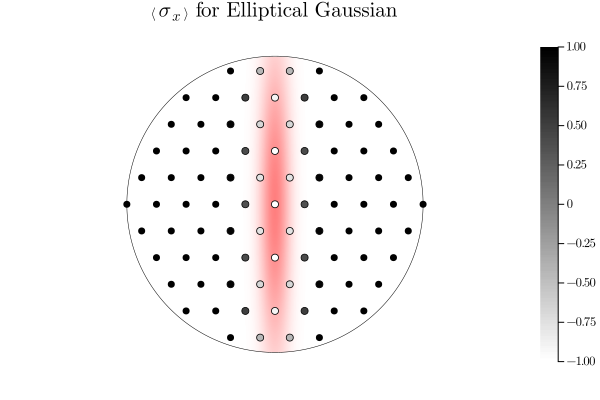

In [2]:
σ1 = .1
σ2 = 1
using LaTeXStrings

function gaussian(σ1, σ2)
    function func(x, y)
        if x^2 + y^2 > (1)^2
            -1
        else
        2*exp(-x^2/σ1^2 + -y^2/σ2^2) - 1
        end
    end
end

z = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("elliptical_gaussian/seq$xx,$yy.csv", String)
    push!(z, data)
end
seq = [[parse(Complex{Float64}, ss) for ss in split(s, ',')[1:end-1]] for s in [replace(zz, "\n"=>",") for zz in z]]
zseq = [real(adjoint(s) * [[0 1]; [1 0]]*s) for s in seq]

p = palette([:white, :black], 100);
scale = 2
plot(heatmap(xs, ys, gaussian(σ1, σ2); c=palette([:white, :red], 100), alpha=.5))
scatter!(scale*x, scale*y, marker_z = zseq, c=p, clim  = (-1,1))
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\left\langle\sigma_x\right\rangle\textrm{ for Elliptical Gaussian}", fontfamily="Computer Modern")

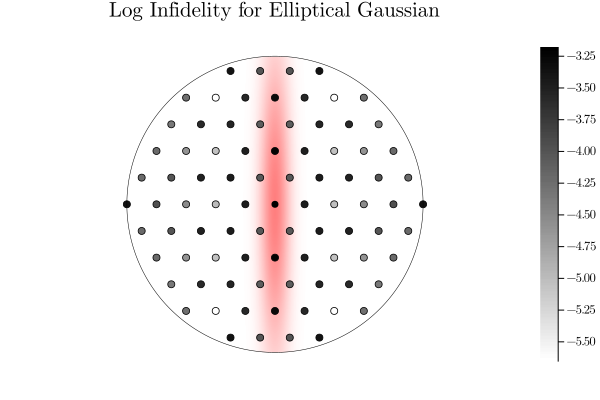

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/oZheM/src/backends/gr.jl:498
┌ Warning: Multiple series with different fill alpha share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/oZheM/src/backends/gr.jl:498


In [3]:
σ1 = .1
σ2 = 1
using LaTeXStrings



raw = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("elliptical_gaussian/infid$xx,$yy.csv", String)
    push!(raw, data)
end
z = ([el[1] for el in [[parse(Float64, s) for s in split(zz, "\n")[1:end-1]] for zz in raw]])
using Plots


function gaussian(σ1, σ2)
    function func(x, y)
        if x^2 + y^2 > (1)^2
            minimum(log.(10, z))
        else
        (maximum(log.(10, z)) - minimum(log.(10, z)))*exp(-x^2/σ1^2 + -y^2/σ2^2) + minimum(log.(10, z))
        end
    end
end

p = palette([:white, :black], 100);

scale = 2
plot(heatmap(xs, ys, gaussian(σ1, σ2); c=palette([:white, :red], 100), alpha=.5))
scatter!(scale*x, scale*y, marker_z = log.(10, z), c=p)
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Log Infidelity for Elliptical Gaussian}", fontfamily="Computer Modern")